In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import cv2
%matplotlib inline

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
tf.__version__

'2.9.2'

# Data Preprocessing :

## VQA Data & Annotation -

In [4]:
def download_vqa():
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip -P zip/')
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip -P zip/')
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Test_mscoco.zip -P zip/')
    
     # Download the VQA Annotations
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip -P zip/')
    os.system('wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip -P zip/')
    
      # Unzip the annotations
    os.system('unzip zip/v2_Questions_Train_mscoco.zip -d annotations/')
    os.system('unzip zip/v2_Questions_Val_mscoco.zip -d annotations/')
    os.system('unzip zip/v2_Questions_Test_mscoco.zip -d annotations/')
    os.system('unzip zip/v2_Annotations_Train_mscoco.zip -d annotations/')
    os.system('unzip zip/v2_Annotations_Val_mscoco.zip -d annotations/')
    

In [5]:
#download_vqa()

## Coco Images -

In [6]:
def download_images():
    os.system('wget http://images.cocodataset.org/zips/train2014.zip -P coco_images/')
    os.system('wget http://images.cocodataset.org/zips/val2014.zip -P coco_images/')
    os.system('wget http://images.cocodataset.org/zips/test2015.zip -P coco_images/')

    # Unzip the coco_images
    os.system('unzip coco_images/train2014.zip -d train/')
    os.system('unzip coco_images/val2014.zip -d validation/')
    os.system('unzip coco_images/test2015.zip -d test/')

In [7]:
#download_images()

In [8]:
os.listdir("/Users/prateeksha/annotations/")

['v2_OpenEnded_mscoco_val2014_questions.json',
 'v2_mscoco_train2014_annotations.json',
 'v2_OpenEnded_mscoco_test-dev2015_questions.json',
 'v2_mscoco_val2014_annotations.json',
 'v2_OpenEnded_mscoco_test2015_questions.json',
 'v2_OpenEnded_mscoco_train2014_questions.json']

In [9]:
#os.listdir("/Users/Rajnish/train/train2014/")

In [10]:
#os.listdir("/Users/Rajnish/validation/val2014/")

In [11]:
#os.listdir("/Users/Rajnish/test/test2015")

## Training Dataset Preprocessing :

In [12]:
from os import listdir

train_ques = json.load(open('annotations/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))
train_ans = json.load(open('annotations/v2_mscoco_train2014_annotations.json', 'r'))
train_img_path = 'train/train2014'
train_images= listdir(train_img_path)

print("Total no. of training question are",len(train_ques['questions']))
print("Total no. of training answers are",len(train_ans['annotations']))
print("Total no. of training images are",len(train_images))

Total no. of training question are 443757
Total no. of training answers are 443757
Total no. of training images are 82783


In [13]:
train_ques['questions'][0]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [14]:
train_ans['annotations'][0]

{'question_type': 'what is this',
 'multiple_choice_answer': 'net',
 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 458752,
 'answer_type': 'other',
 'question_id': 458752000}

In [15]:
train_images[0]

'COCO_train2014_000000223373.jpg'

In [16]:
from tqdm import tqdm
# CONVERTING DATA FROM JASON TO PANDAS DATAFRAME
training=[]
imdir='%s/COCO_%s_%012d.jpg'
subtype='train2014'

for i in tqdm(range(len(train_ans['annotations']))):
    train_answ = train_ans['annotations'][i]['multiple_choice_answer']
    train_image_path=imdir%(subtype,subtype,train_ans['annotations'][i]['image_id'])
    train_que = train_ques['questions'][i]['question']
    train_ques_id = train_ans['annotations'][i]['question_id']
    train_image_id = train_ans['annotations'][i]['image_id']

    training.append({'Question_ID':train_ques_id,'Image_ID':train_image_id, 'image_path':train_image_path,'Question' : train_que,'Answer':train_answ})

100%|██████████████████████████████| 443757/443757 [00:00<00:00, 1061451.35it/s]


In [17]:
training_data=pd.DataFrame(training)
training_data.head()

,Question_ID,Image_ID,image_path,Question,Answer
0,458752000,458752,train2014/COCO_train2014_000000458752.jpg,What is this photo taken looking through?,net
1,458752001,458752,train2014/COCO_train2014_000000458752.jpg,What position is this man playing?,pitcher
2,458752002,458752,train2014/COCO_train2014_000000458752.jpg,What color is the players shirt?,orange
3,458752003,458752,train2014/COCO_train2014_000000458752.jpg,Is this man a professional baseball player?,yes
4,262146000,262146,train2014/COCO_train2014_000000262146.jpg,What color is the snow?,white


In [18]:
training_data.shape

(443757, 5)

## Validation Dataset Preprocessing :

In [19]:
val_ques = json.load(open('annotations/v2_OpenEnded_mscoco_val2014_questions.json', 'r'))
val_ans = json.load(open('annotations/v2_mscoco_val2014_annotations.json', 'r'))
val_img_path = 'validation/val2014'
val_images= listdir(val_img_path)

print("Total no. of Validation question are",len(val_ques['questions']))
print("Total no. of  Validation answers are",len(val_ans['annotations']))
print("Total no. of Validation images are",len(val_images))

Total no. of Validation question are 214354
Total no. of  Validation answers are 214354
Total no. of Validation images are 40504


In [20]:
val_ques['questions'][0]

{'image_id': 262148,
 'question': 'Where is he looking?',
 'question_id': 262148000}

In [21]:
val_ans['annotations'][0]

{'question_type': 'none of the above',
 'multiple_choice_answer': 'down',
 'answers': [{'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'at table', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'skateboard', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'table', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 262148,
 'answer_type': 'other',
 'question_id': 262148000}

In [22]:
val_images[0]

'COCO_val2014_000000265550.jpg'

In [23]:
Validation=[]
imdir='%s/COCO_%s_%012d.jpg'
subtype='val2014'

for i in tqdm(range(len(val_ans['annotations']))):
    val_answ = val_ans['annotations'][i]['multiple_choice_answer']
    val_image_path=imdir%(subtype,subtype,val_ans['annotations'][i]['image_id'])
    val_que = val_ques['questions'][i]['question']
    val_ques_id = val_ans['annotations'][i]['question_id']
    val_image_id = val_ans['annotations'][i]['image_id']

    Validation.append({'Question_ID':val_ques_id, 'Image_ID':val_image_id,'image_path':val_image_path,'Question' : val_que,'Answer':val_answ})



100%|███████████████████████████████| 214354/214354 [00:00<00:00, 849440.67it/s]


In [24]:
Validation_data=pd.DataFrame(Validation)
Validation_data.head()

,Question_ID,Image_ID,image_path,Question,Answer
0,262148000,262148,val2014/COCO_val2014_000000262148.jpg,Where is he looking?,down
1,262148001,262148,val2014/COCO_val2014_000000262148.jpg,What are the people in the background doing?,watching
2,262148002,262148,val2014/COCO_val2014_000000262148.jpg,What is he on top of?,picnic table
3,393225000,393225,val2014/COCO_val2014_000000393225.jpg,What website copyrighted the picture?,foodiebakercom
4,393225001,393225,val2014/COCO_val2014_000000393225.jpg,Is this a creamy soup?,no


In [25]:
Validation_data.shape

(214354, 5)

## Test Dataset Preprocessing  :

In [26]:
test_ques = json.load(open('annotations/v2_OpenEnded_mscoco_test-dev2015_questions.json', 'r'))
test_img_path = 'test/test2015'
test_images= listdir(test_img_path)
    
print("Total no. of Test question are",len(test_ques['questions']))
print("Total no. of Test images are",len(test_images))

Total no. of Test question are 107394
Total no. of Test images are 81434


In [27]:
test_ques['questions'][0]

{'image_id': 262144,
 'question': 'What credit card company is on the banner in the background?',
 'question_id': 262144005}

In [28]:
test_images[0]

'COCO_test2015_000000209999.jpg'

In [29]:
test = []
imdir='%s/COCO_%s_%012d.jpg'
subtype = 'test2015'

for i in tqdm(range(len(test_ques['questions']))):
    test_image_path=imdir%(subtype,subtype,test_ques['questions'][i]['image_id'])
    test_que = test_ques['questions'][i]['question']
    test_ques_id = test_ques['questions'][i]['question_id']
    test_image_id = test_ques['questions'][i]['image_id']

    test.append({'Question_ID':test_ques_id,'Image_ID':test_image_id, 'image_path':test_image_path,'Question' : test_que})

100%|██████████████████████████████| 107394/107394 [00:00<00:00, 1390956.20it/s]


In [30]:
test_data=pd.DataFrame(test)
test_data.head()

,Question_ID,Image_ID,image_path,Question
0,262144005,262144,test2015/COCO_test2015_000000262144.jpg,What credit card company is on the banner in t...
1,262144003,262144,test2015/COCO_test2015_000000262144.jpg,Is the pitcher wearing a hat?
2,262144000,262144,test2015/COCO_test2015_000000262144.jpg,Is the ball flying towards the batter?
3,524289001,524289,test2015/COCO_test2015_000000524289.jpg,Are the horses playing a game?
4,524289002,524289,test2015/COCO_test2015_000000524289.jpg,What is the color of water in the image?


In [31]:
test_data.shape

(107394, 4)

# Data Auditing and Exploratory Data Analysis (EDA) :

In [32]:
training_data.info() # variables, non-null values, and datatypes of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443757 entries, 0 to 443756
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Question_ID  443757 non-null  int64 
 1   Image_ID     443757 non-null  int64 
 2   image_path   443757 non-null  object
 3   Question     443757 non-null  object
 4   Answer       443757 non-null  object
dtypes: int64(2), object(3)
memory usage: 16.9+ MB


In [33]:
Validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214354 entries, 0 to 214353
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Question_ID  214354 non-null  int64 
 1   Image_ID     214354 non-null  int64 
 2   image_path   214354 non-null  object
 3   Question     214354 non-null  object
 4   Answer       214354 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.2+ MB


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107394 entries, 0 to 107393
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Question_ID  107394 non-null  int64 
 1   Image_ID     107394 non-null  int64 
 2   image_path   107394 non-null  object
 3   Question     107394 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [35]:
training_data.isnull().sum()

Question_ID    0
Image_ID       0
image_path     0
Question       0
Answer         0
dtype: int64

In [36]:
Validation_data.isnull().sum()

Question_ID    0
Image_ID       0
image_path     0
Question       0
Answer         0
dtype: int64

In [37]:
test_data.isnull().sum()

Question_ID    0
Image_ID       0
image_path     0
Question       0
dtype: int64

In [38]:
import re

prepro_train_questions = []
prepro_val_questions = []
prepro_test_questions = []

def decontracted(phrase):
 
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

for question in tqdm(training_data['Question'].values):
    training_que = decontracted(question) 
    prepro_train_questions.append(training_que.lower().strip())

training_data['Question']=prepro_train_questions
training_data.head(5)



100%|███████████████████████████████| 443757/443757 [00:01<00:00, 306827.54it/s]


,Question_ID,Image_ID,image_path,Question,Answer
0,458752000,458752,train2014/COCO_train2014_000000458752.jpg,what is this photo taken looking through?,net
1,458752001,458752,train2014/COCO_train2014_000000458752.jpg,what position is this man playing?,pitcher
2,458752002,458752,train2014/COCO_train2014_000000458752.jpg,what color is the players shirt?,orange
3,458752003,458752,train2014/COCO_train2014_000000458752.jpg,is this man a professional baseball player?,yes
4,262146000,262146,train2014/COCO_train2014_000000262146.jpg,what color is the snow?,white


In [39]:
for question in tqdm(Validation_data['Question'].values):
    Validation_que = decontracted(question) 
    prepro_val_questions.append(Validation_que.lower().strip())

Validation_data['Question']=prepro_val_questions
Validation_data.head(5)

100%|███████████████████████████████| 214354/214354 [00:00<00:00, 303395.40it/s]


,Question_ID,Image_ID,image_path,Question,Answer
0,262148000,262148,val2014/COCO_val2014_000000262148.jpg,where is he looking?,down
1,262148001,262148,val2014/COCO_val2014_000000262148.jpg,what are the people in the background doing?,watching
2,262148002,262148,val2014/COCO_val2014_000000262148.jpg,what is he on top of?,picnic table
3,393225000,393225,val2014/COCO_val2014_000000393225.jpg,what website copyrighted the picture?,foodiebakercom
4,393225001,393225,val2014/COCO_val2014_000000393225.jpg,is this a creamy soup?,no


In [40]:
for question in tqdm(test_data['Question'].values):
    test_que = decontracted(question) 
    prepro_test_questions.append(test_que.lower().strip())

test_data['Question']=prepro_test_questions
test_data.head(5)

100%|███████████████████████████████| 107394/107394 [00:00<00:00, 296541.57it/s]


,Question_ID,Image_ID,image_path,Question
0,262144005,262144,test2015/COCO_test2015_000000262144.jpg,what credit card company is on the banner in t...
1,262144003,262144,test2015/COCO_test2015_000000262144.jpg,is the pitcher wearing a hat?
2,262144000,262144,test2015/COCO_test2015_000000262144.jpg,is the ball flying towards the batter?
3,524289001,524289,test2015/COCO_test2015_000000524289.jpg,are the horses playing a game?
4,524289002,524289,test2015/COCO_test2015_000000524289.jpg,what is the color of water in the image?


In [41]:
test_data.shape

(107394, 4)

In [42]:
train_an1 = training_data[training_data['Answer']=='yes']['Answer'].count()+training_data[training_data['Answer']=='no']['Answer'].count()
train_an2 = len(training_data) - train_an1
print("Total no of binary(yes/no)answers  :",train_an1)
print("Total no of multiple answers        :",train_an2)


Total no of binary(yes/no)answers  : 167494
Total no of multiple answers        : 276263


In [43]:
Val_an1 = Validation_data[Validation_data['Answer']=='yes']['Answer'].count()+Validation_data[Validation_data['Answer']=='no']['Answer'].count()
Val_an2 = len(Validation_data) - Val_an1
print("Total no of binary(yes/no)answers  :",Val_an1)
print("Total no of multiple answers        :",Val_an2)

Total no of binary(yes/no)answers  : 80810
Total no of multiple answers        : 133544


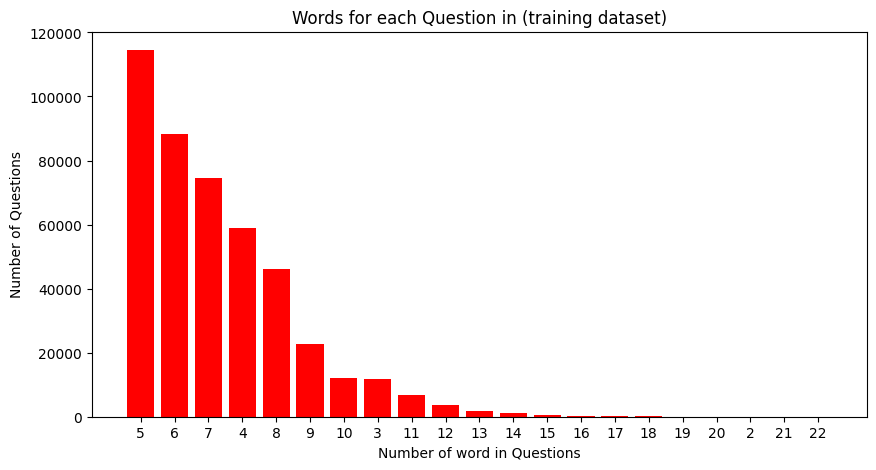

In [44]:
train_word = training_data['Question'].str.split().apply(len).value_counts()
train_dic = dict(train_word)
train_dic = dict(sorted(train_dic.items(), key=lambda kv: kv[1],reverse=True))


train_ind = np.arange(len(train_dic))
c = 'Red'
plt.figure(figsize=(10,5))
p1 = plt.bar(train_ind, list(train_dic.values()),color = c)

plt.ylabel('Number of Questions')
plt.xlabel('Number of word in Questions')
plt.title('Words for each Question in (training dataset)')
plt.xticks(train_ind, list(train_dic.keys()))
plt.show()

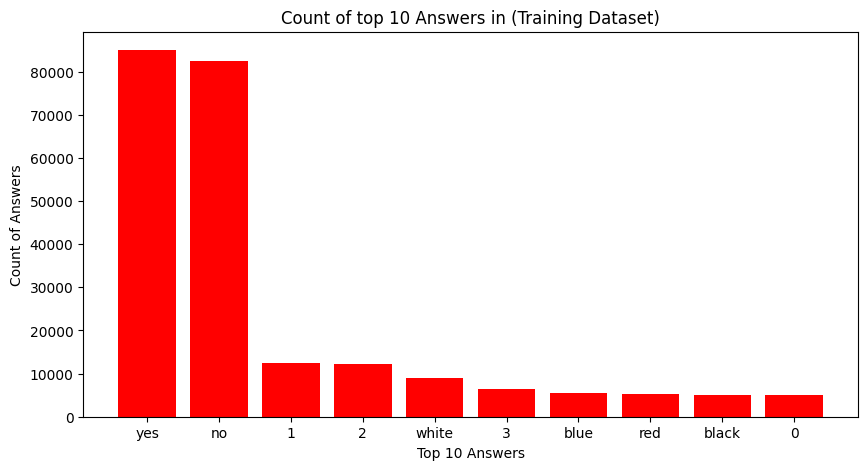

In [45]:
train_word_ans = training_data['Answer'].value_counts()[0:10]
train_dic_ans = dict(train_word_ans)
train_dic_ans = dict(sorted(train_dic_ans.items(), key=lambda kv: kv[1],reverse=True))


train_ind_ans = np.arange(len(train_dic_ans))
plt.figure(figsize=(10,5))
c = 'Red'
a1 = plt.bar(train_ind_ans, list(train_dic_ans.values()),color = c)

plt.ylabel('Count of Answers')
plt.xlabel('Top 10 Answers')
plt.title('Count of top 10 Answers in (Training Dataset)')
plt.xticks(train_ind_ans, list(train_dic_ans.keys()))
plt.show()

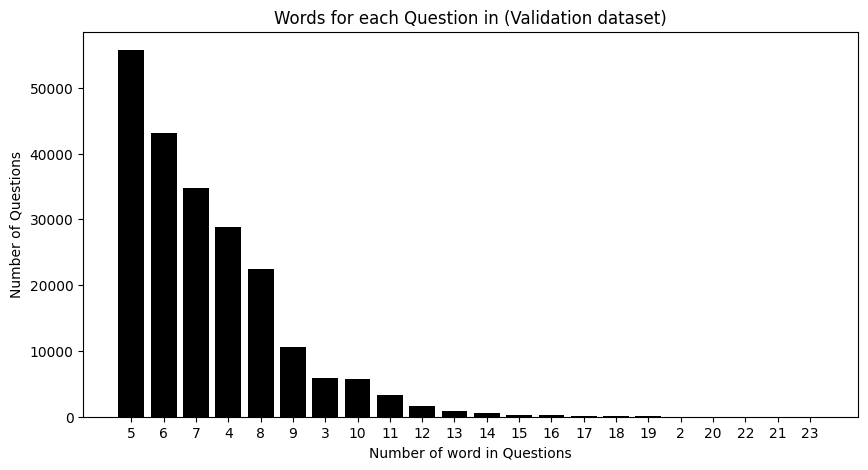

In [46]:
val_count = Validation_data['Question'].str.split().apply(len).value_counts()
val_dict = dict(val_count)
val_dict = dict(sorted(val_dict.items(), key=lambda kv: kv[1],reverse=True))


val_ind = np.arange(len(val_dict))
c = 'Black'
plt.figure(figsize=(10,5))
p2 = plt.bar(val_ind, list(val_dict.values()),color = c)

plt.ylabel('Number of Questions')
plt.xlabel('Number of word in Questions')
plt.title('Words for each Question in (Validation dataset)')
plt.xticks(val_ind, list(val_dict.keys()))
plt.show()

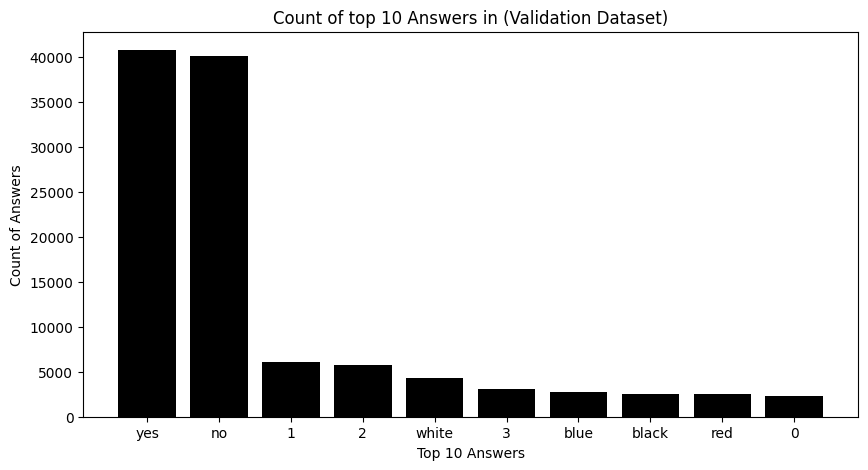

In [47]:
Vald_word_ans = Validation_data['Answer'].value_counts()[0:10]
Vald_dic_ans = dict(Vald_word_ans)
Vald_dic_ans = dict(sorted(Vald_dic_ans.items(), key=lambda kv: kv[1],reverse=True))

Vald_ind_ans = np.arange(len(Vald_dic_ans))
plt.figure(figsize=(10,5))
c = 'Black'
a2 = plt.bar(Vald_ind_ans, list(Vald_dic_ans.values()),color = c)

plt.ylabel('Count of Answers')
plt.xlabel('Top 10 Answers')
plt.title('Count of top 10 Answers in (Validation Dataset)')
plt.xticks(Vald_ind_ans, list(Vald_dic_ans.keys()))
plt.show()

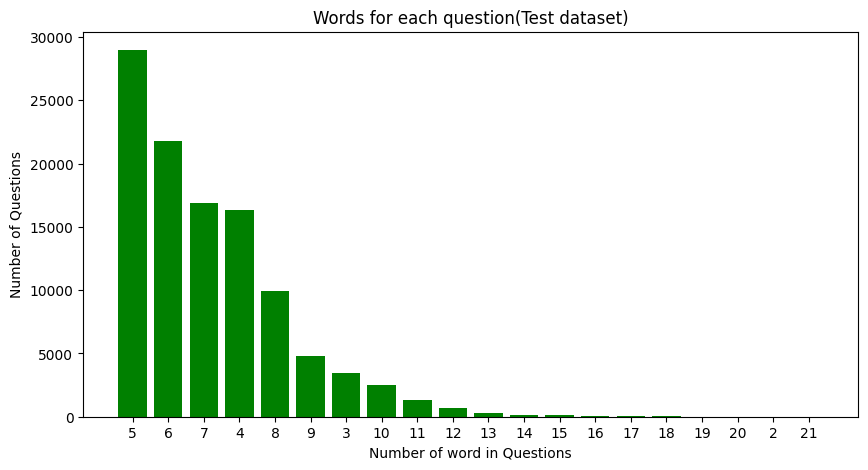

In [48]:
test_count = test_data['Question'].str.split().apply(len).value_counts()
test_dict = dict(test_count)
test_dict = dict(sorted(test_dict.items(), key=lambda kv: kv[1],reverse=True))


test_ind = np.arange(len(test_dict))
c = 'Green'
plt.figure(figsize=(10,5))
p3 = plt.bar(test_ind, list(test_dict.values()),color = c)

plt.ylabel('Number of Questions')
plt.xlabel('Number of word in Questions')
plt.title('Words for each question(Test dataset)')
plt.xticks(test_ind, list(test_dict.keys()))
plt.show()

Observations:

Maximum length of question is 22,23,21 words respectively in training,validation &test dataset.

In [49]:
training_data.to_csv('train_vqa.csv')
Validation_data.to_csv('validation_vqa.csv')
test_data.to_csv('raw_test_vqa.csv')